In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import numpy as np

# Cargar el dataset de dígitos
digits = load_digits()
X, y = digits.images, digits.target  # X tiene forma (n_samples, 8, 8)

# Aplanar las imágenes para red densa
X = X.reshape(X.shape[0], -1)  # (n_samples, 64)

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convertir a tensores de PyTorch
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)  # Multiclase
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Crear DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Definir el modelo
input_size = X_train.shape[1]
num_classes = len(np.unique(y))

class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, num_classes)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)  # logits
        return x

model = MLP()

# Definir pérdida y optimizador
criterion = nn.CrossEntropyLoss()  # Multiclase
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Entrenamiento
epochs = 50
for epoch in range(epochs):
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# Evaluación
model.eval()
with torch.no_grad():
    test_outputs = model(X_test_tensor)
    _, predicted = torch.max(test_outputs, 1)
    accuracy = (predicted == y_test_tensor).float().mean()
    print(f'\nTest Accuracy: {accuracy:.4f}')
    print(classification_report(y_test_tensor, predicted))


Epoch [10/50], Loss: 0.0378
Epoch [20/50], Loss: 0.0061
Epoch [30/50], Loss: 0.0016
Epoch [40/50], Loss: 0.0013
Epoch [50/50], Loss: 0.0013

Test Accuracy: 0.9778
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        33
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        33
           3       0.94      0.97      0.96        34
           4       1.00      1.00      1.00        46
           5       0.94      0.98      0.96        47
           6       0.97      0.97      0.97        35
           7       0.97      0.97      0.97        34
           8       1.00      0.97      0.98        30
           9       1.00      0.93      0.96        40

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



Clase real: 6
Clase predicha: 6


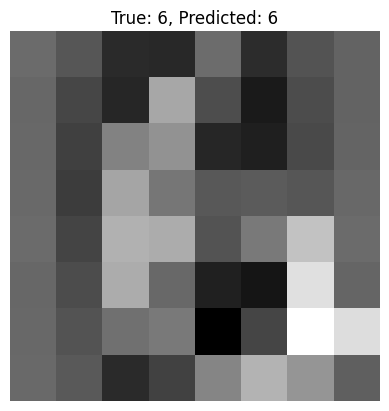

In [ ]:
import matplotlib.pyplot as plt

# Elegir un índice de ejemplo del conjunto de prueba
idx = 0  # puedes cambiarlo
image = X_test[idx]  # ya está aplanada y escalada
label_true = y_test[idx]

# Convertir a tensor
image_tensor = torch.tensor(image, dtype=torch.float32).unsqueeze(0)  # agregar dimensión batch

# Pasar por el modelo
model.eval()
with torch.no_grad():
    output = model(image_tensor)
    predicted_class = torch.argmax(output, dim=1).item()

print(f'Clase real: {label_true}')
print(f'Clase predicha: {predicted_class}')

# Mostrar la imagen
plt.imshow(X_test[idx].reshape(8,8), cmap='gray')
plt.title(f'True: {label_true}, Predicted: {predicted_class}')
plt.axis('off')
plt.show()
